<i><b>Public AI</b></i>
<br>
# Keras를 활용한 Pretrained Model 사용하기

### _Objective_

* Keras의 강점 중 하나는 바로 Pretrained Model을 이용하기가 매우 편한다는 것입니다. <br>
* Keras는 자체적으로 학습된 여러 모델들(RESNET, Inception Net)등을 불러다가 쓸 수 있습니다.

In [1]:
%matplotlib inline
import os
import cv2
import numpy as np
from zipfile import ZipFile

import matplotlib.pyplot as plt
from tensorflow.keras.utils import get_file

## Dataset) Cat VS Dog Dataset

개와 고양이를 분류하기 위해, 아래와 같이 데이터셋을 준비하였습니다.<Br> 

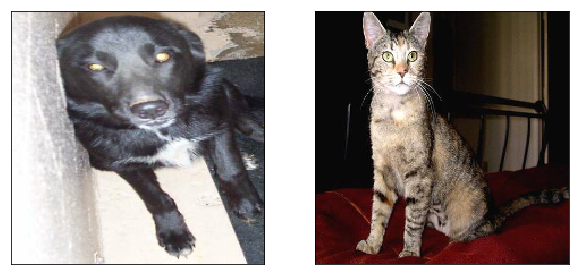

In [2]:
data_dir = "cat-vs-dog"
fpath = get_file("cat-vs-dog.zip", 
                 "https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cat-vs-dog.zip")

if not os.path.exists(data_dir):
    with ZipFile(fpath,'r') as f:
        f.extractall(data_dir)
        
# 이미지 시각화하기 
dog_image = cv2.imread(
    os.path.join(data_dir,'train','dog','dog.10000.jpg'))
dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2RGB)
dog_image = cv2.resize(dog_image, (224,224))

cat_image = cv2.imread(
    os.path.join(data_dir,'train','cat','cat.10000.jpg'))
cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2RGB)
cat_image = cv2.resize(cat_image, (224,224))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(dog_image)
ax = fig.add_subplot(1,2,2)
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(cat_image)
plt.show()        

<br><br>

# \[ Keras의 다양한 Pretrained Model들  \]
---

Keras에서는 아래의 모델들을 지원해 줍니다. 현재까지는 ImageNet으로 학습된 모델들만 제공해주고 있는데, 향후 더 늘어날 것이라 기대되고 있습니다. 

<br>

## 1. Keras가 제공하는 Pretrained Model list들



| Model |	Size	|Top-1 Accuracy	|Top-5 Accuracy|	Parameters|	Depth |
|---|---|---|---|---|---|
|Xception|	88 MB|	0.790|	0.945|	22,910,480|	126|
|VGG16|	528 MB|	0.713|	0.901|	138,357,544	|23|
|VGG19|	549 MB|	0.713|	0.900|	143,667,240	|26|
|ResNet50|	98 MB|	0.749|	0.921|	25,636,712	|-|
|ResNet101|	171 MB|	0.764|	0.928|	44,707,176	|-|
|ResNet152|	232 MB|	0.766|	0.931|	60,419,944	|-|
|ResNet50V2|	98 MB|	0.760|	0.930|	25,613,800	|-|
|ResNet101V2|	171 MB|	0.772|	0.938|	44,675,560	|-|
|ResNet152V2|	232 MB|	0.780|	0.942|	60,380,648	|-|
|ResNeXt50|	96 MB|	0.777|	0.938|	25,097,128	|-|
|ResNeXt101|	170 MB|	0.787|	0.943|	44,315,560	|-|
|InceptionV3|	92 MB|	0.779|	0.937|	23,851,784	|159|
|InceptionResNetV2|	215 MB|	0.803|	0.953	|55,873,736	|572|
|MobileNet|	16 MB|	0.704|	0.895|	4,253,864	|88|
|MobileNetV2|	14 MB|	0.713|	0.901|	3,538,984	|88|
|DenseNet121|	33 MB|	0.750|	0.923|	8,062,504	|121|
|DenseNet169|	57 MB|	0.762|	0.932|	14,307,880	|169|
|DenseNet201|	80 MB|	0.773|	0.936|	20,242,984	|201|
|NASNetMobile|	23 MB|	0.744|	0.919|	5,326,716	|-|
|NASNetLarge|	343 MB|	0.825|	0.960|	88,949,818	|-|

정확도와 처리 속도는 보통 Reverage 관계에 있습니다. <br>
상황에 맞도록, 적절한 모델들을 골라 이용하면 됩니다. 

## 2. Pretrained Model 가져오기

모든 pretrained model은 `keras.applications` 하위 모듈에 존재합니다.<br>
거의 모든 pretrained model은 아래의 Argument로 지정할 수 있습니다.

| 매개변수 이름 | 매개변수 설명 |
| ----  | ----- |
| `weights` | 모델을 초기화할 데이터셋을 지칭합니다. 지금은 imagenet뿐입니다. |
| `inlude_top` | 네트워크의 최상위 Fully connected Classifer을 포함할지 안 할지를 지정합니다. 기본값은 ImageNet의 클래스 1,000개에 대응되는 Classfier을 포함합니다. Transfer Learning의 경우 이 부분을 제거합니다. |
| `input_shape` | 네트워크에 주입할 이미지 텐서의 크기입니다. 이 매개변수는 선택 사항입니다. 지정하지 않을 경우 네트워크가 어떤 크기의 입력도 처리할 수 있습니다. |

이번 시간에는 VGG 모델을 가져와보도록 하겠습니다.


### (1) VGG 모델 가져오기

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg16 = VGG16()
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### (2) Pretrained Model을 통해 이미지 분류하기

가져온 모델을 통해 예측해보도록 하겠습니다. VGG 모델은 RGB의 평균값`[123.68, 116.779, 103.939]`을 빼주는 방식으로 전처리가 되어있습니다. 

In [7]:
rgb_mean = np.array([123.68,116.779,103.939,],np.float32)

# 전처리 필수
output = vgg16.predict()
output

우리는 Softmax로 된 예측결과를 받았습니다. 이는 해석하기 어려우므로, `decode_predictions`을 통해, 어떤 이미지로 분류했는지 확인해보도록 하겠습니다.<br>

In [6]:
from tensorflow.keras.applications.vgg16 import decode_predictions

decode_predictions(output)

[[('n02105412', 'kelpie', 0.45676023),
  ('n02099712', 'Labrador_retriever', 0.19153169),
  ('n02104365', 'schipperke', 0.080705516),
  ('n02099267', 'flat-coated_retriever', 0.04350598),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.03304695)]]

강아지 품종 중 하나인 오스트레일리안 켈피로 나왔습니다.<br> 그리고 후순위로 래브라도 리트리버로 나온 것을 미루어 보아, 강아지 종에서 정확히 어떤 종인지를 확신하지 못하고 있는 것으로 보입니다.

<br><br>

# \[ Keras을 활용한 Transfer Learning \]
---


## 1. Tranfer Learning이란? 

일반적으로 우리는 대규모의 데이터셋을 확보하여, 학습에 이용하기는 어렵습니다. 양질의 데이터셋을 모으는 것은 매우 값비싼 작업이기 때문입니다. 보통 작은 이미지 데이터셋을 가지고 처리하는데,이를 위한 일반적이고 매우 효과적인 방법은 Transfer Learning입니다.



### (1) Transfer Learning의 원리

이미지의 많은 특성들은 서로 공유됩니다. 사람을 식별하는데 이용했던 윤곽선 정보, 피부 정보는 강아지나 동물을 식별하는 데에도 유용하게 쓰일 수 있는 등 이미지의 특성은 서로 많이 유사하기 때문입니다.<br>

이미지넷은 1400만 개의 라벨링된 이미지와 1000개의 카테고리로 이루어진 대규모 데이터셋으로, 일상 대부분의 사물에 대한 정보가 들어있습니다.<br>
이러한 데이터셋으로 훈련된 CNN을 활용하면, 우리는 적은 데이터셋으로도 모델을 학습시킬 수 있게 됩니다.

### (2) Transfer Learning의 절차

우리는 사전에 학습된 모델을 받아온 후, 마지막 사물을 분류해내는 Classifer 부분을 떼고, Convolution Layer 부분만 이용하게 됩니다.<br> 
Model에서 영상의 특징을 주로 뽑아오는 부분은 Conv layer 부분이고, 그러한 특징을 통해 사물을 판단하는 부분은 Fully Connected Layer 부분이기 때문입니다.<bR>

![Imgur](https://i.imgur.com/i1pddSu.png)

<br>

## 2. pretrained VGG Network 구성하기

기학습된 VGG Network 가져와, 개와 고양이를 분류하는 모델을 구성해보도록 하겠습니다.

### (1) VGG 모델 가져오기

이번에 모델을 가져올 때에는 마지막 분류하는 레이어(Classifer)들을 제거하고 가져와야 합니다.

In [ ]:
vgg16 = #
vgg16.summary()

### (2) VGG 16 Freezing하기

모델을 컴파일하고 훈련하기 전에 합성곱 기반 층을 동결할 수 있습니다. <bR>
하나 이상의 층을 동결한다는 것은 훈련하는 동안 가중치가 업데이트되지 않도록 막는다는 뜻입니다.<br>
Freezing을 할 경우, 우리는 전체 가중치를 학습시키는 것이 아니라, 일부 가중치만 학습시키면 되기 때문에<br>
보다 편리하고 빠르게 학습할 수 있습니다.

In [ ]:
vgg16.trainable = False # Keras에서는 이와 같은 방식으로 Weight을 동결시킬 수 있습니다.

vgg16.summary()

### (3) Fine-Tuning을 위한 Conv Layer Freezing 해제

이미지마다 특성들이 조금씩 다르기 때문에 성능을 개선하기 위해서, 합성곱 층 중 마지막 일부 층도 함께 학습시키는 경우가 많습니다.<br>
Fine-Tuning은 특성 추출에 사용했던 모델의 상위 층 몇 개를 동결에서 해제하고 모델에 새로 추가한 층과 함께 훈련하는 것입니다.<br>

보통 합성곱 기반 층에 있는 하위 층들은 좀 더 일반적이고 재사용이 가능한 특성들을 인코딩합니다. 반면에 상위 층은 좀 더 특화된 특성을 인코딩합니다.<br>
새로운 문제에 재활용하도록 수정이 필요한 것은 구체적인 특성이므로 이들을 미세 조정하는 것이 유리합니다.<br>
하위 층으로 갈수록 미세 조정에 대한 효과가 감소합니다.


In [ ]:
# 미세조정하기
vgg16.summary()    

### (4) 분류기 붙이기

VGG16모델의 Output에서 분류기 부분을 연결시켜 보도록 하겠습니다.<br>
Global Average Pooling2D 부분을 통해, 이미지의 크기에 구애받지 않도록 설계하였습니다.

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Dropout

In [ ]:
# VGG-16 Freezing
vgg16 = VGG16(weights='imagenet', include_top=False)
vgg16.trainable = False

# GlobalAveragePooling2D 이용해보기

model = Model(vgg16.input, pred)

In [ ]:
model.summary()

<br>

## 3. Cat VS Dog Dataset 학습시키기
---

* Keras의 Preprocessing Module을 활용하여 진행해보도록 하겠습니다.

### (1) `ImageDataGenerator`를 활용한 데이터 불러오기

Keras에서는 Data Augmentation을 편리하게 적용하기 위한 Helper 메소드로 `ImageDataGenerator`을 지원합니다.<br>
따로 구현하지 않더라도 이를 활용하여 편리하게 데이터 증강기법을 적용할 수 있습니다.

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(samplewise_center=True, # 값의 범위를 VGG 네트워크와 동일하게 맞춰주어야 함.
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(samplewise_center=True)

In [10]:
train_generator = train_datagen.flow_from_directory(directory=os.path.join(data_dir,'train'),
                                                    target_size=(100,100),
                                                    batch_size=32,
                                                    class_mode='binary',)
test_generator = test_datagen.flow_from_directory(directory=os.path.join(data_dir,'test'),
                                                  target_size=(100,100),
                                                  batch_size=100,
                                                  class_mode='binary',)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


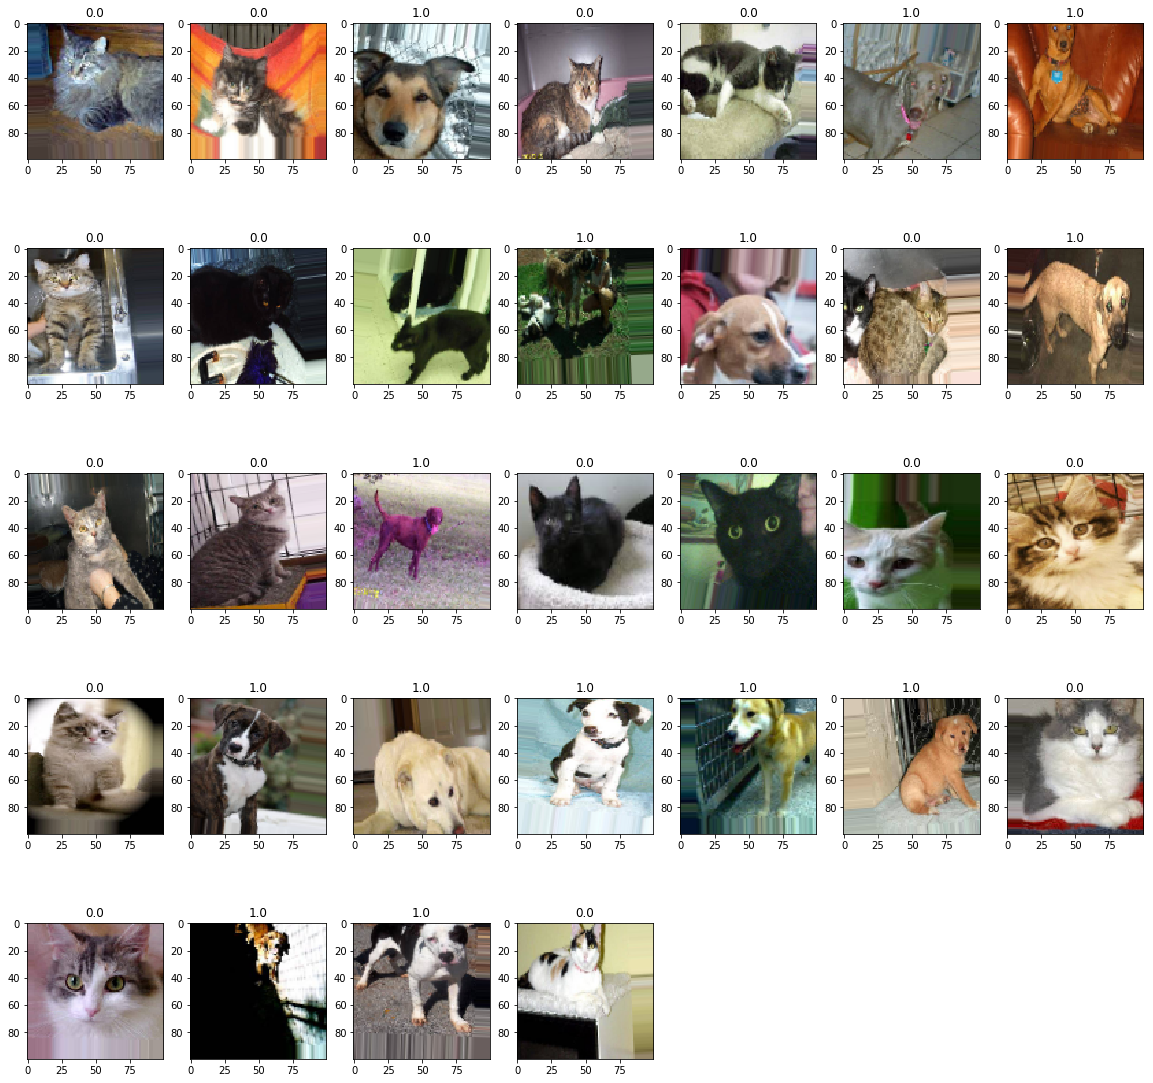

In [11]:
# Sample 이미지 확인하기
images, labels = train_generator[0]

fig = plt.figure(figsize=(20,20))

for idx, (image, label) in enumerate(zip(images, labels),1):
    ax = fig.add_subplot(5,7,idx)
    ax.set_title(label)
    image = (image - image.min())/(image.max()-image.min())
    ax.imshow(image)
plt.show()

### (2) 모델 학습 형태 지정하기

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

# 컴파일하기

### (3) 모델 학습시키기

In [ ]:
# 학습시키기

### (4) 모델 평가하기

In [ ]:
# 평가하기

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/05/14

---